In [1]:
import numpy as np

**8.**

In [51]:
A = np.array(
    [
        [1, -2],
        [3, -4]
    ]
)


def diagonalize(A):
    eigenvalues, P = np.linalg.eig(A)
    
    for i, v in enumerate(P.transpose()):
        P[:, i] =  v / v.min()
        
    return eigenvalues, P


def x_function(eig, P, c, t):
    values = 0
    for i in range(2):
        v_i = P[:, i].reshape(-1, 1)
        values += c[i] * v_i @ np.exp(eig[i]*t)
    return values


def compute_initial_value(A, x0):
    t = np.linspace(0, 10, 100).reshape(1, -1)
    eig, P = diagonalize(A)
    c = np.linalg.solve(P, x0).flatten()
    values = x_function(eig, P, c, t)
    return values


def initial_points():

    n_points = 20
    
    theta = np.linspace(0, 2 * np.pi, n_points)
    radius = 5
    
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    
    x0_points = np.array([x, y]) # (2, n_points)

    return x0_points

    

x0_points = initial_points()

points = np.array([0, 0]).reshape(-1, 1)

for i in range(x0_points.shape[1]):
    x0 = x0_points[:, i].reshape(-1, 1)
    new_points = compute_initial_value(A, x0)
    points = np.concatenate([points, new_points], axis=1)

print(points[:, 30:40])

[[0.77296932 0.70118512 0.63584409 0.57641014 0.52238356 0.47330021
  0.42873043 0.38827755 0.35157625 0.31829079]
 [0.75869293 0.68952019 0.62631292 0.56862244 0.51602039 0.468101
  0.42448227 0.38480647 0.34874011 0.31597344]]


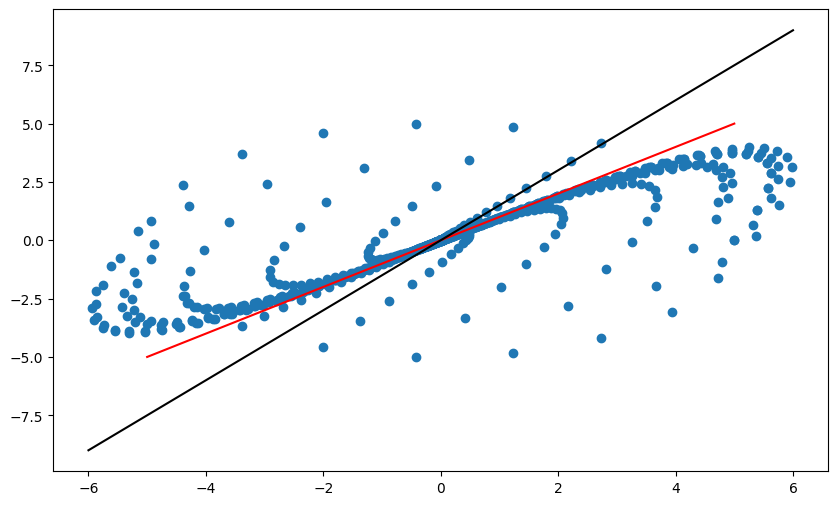

In [52]:
import matplotlib.pyplot as plt

v_1 = np.array([1, 1]).reshape(-1, 1)
v_2 = np.array([2, 3]).reshape(-1, 1)

line_1 = v_1 @ np.linspace(-5, 5, 2).reshape(1, -1)
line_2 = v_2 @ np.linspace(-3, 3, 2).reshape(1, -1)

plt.figure(figsize=(10,6))
plt.scatter(points[0], points[1]);
plt.plot(line_1[0], line_1[1], color="r")
plt.plot(line_2[0], line_2[1], color="k")

In [36]:
eig, P = diagonalize(A)
print(eig)
print()
print(P)

[-1. -2.]

[[1.  1. ]
 [1.  1.5]]
